<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp'>

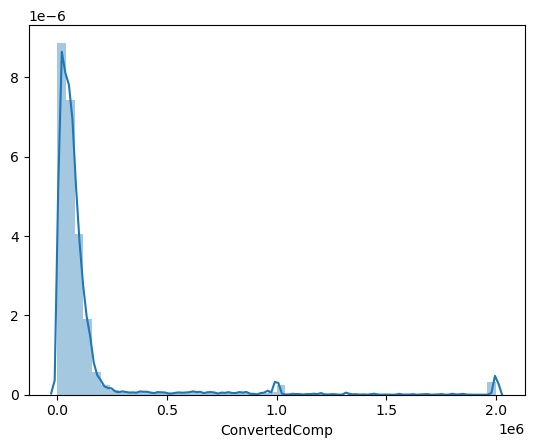

In [3]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt
df = df[~df['ConvertedComp'].isnull()]
sns.distplot(df['ConvertedComp'])

Plot the histogram for the column `ConvertedComp`.


(array([9659.,  238.,  115.,  125.,   99.,  131.,   34.,   15.,   15.,
         151.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <BarContainer object of 10 artists>)

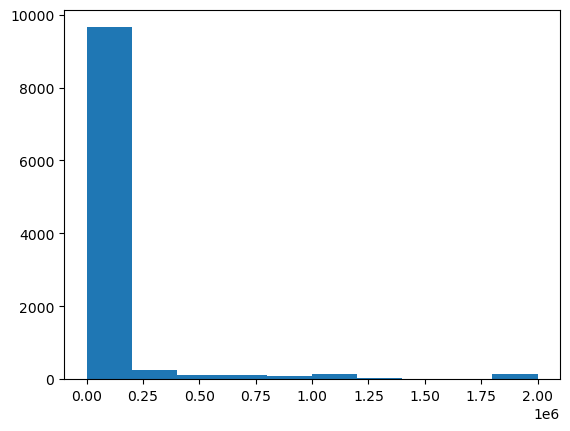

In [4]:
# your code goes here
plt.hist(df['ConvertedComp'])

What is the median of the column `ConvertedComp`?


In [5]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [6]:
# your code goes here
df[df['Gender'] == 'Man'].value_counts().sum()

962

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
# your code goes here
df[df['Gender'] == 'Woman'].median()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Respondent       12365.0
CompTotal        65000.0
ConvertedComp    57708.0
WorkWeekHrs         40.0
CodeRevHrs           4.0
Age                 28.0
dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
# your code goes here
import numpy
df_min, df_max = df['Age'].min(), df['Age'].max()
x = df['Age'].quantile(0.75)
y = df['Age'].quantile(0.25)
print(df_min)
print(y)
print(df['Age'].median())
print(x)
print(df_max)

16.0
25.0
29.0
35.0
99.0


Plot a histogram of the column `Age`.


(array([1.929e+03, 4.968e+03, 2.406e+03, 7.880e+02, 2.100e+02, 4.800e+01,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([16. , 24.3, 32.6, 40.9, 49.2, 57.5, 65.8, 74.1, 82.4, 90.7, 99. ]),
 <BarContainer object of 10 artists>)

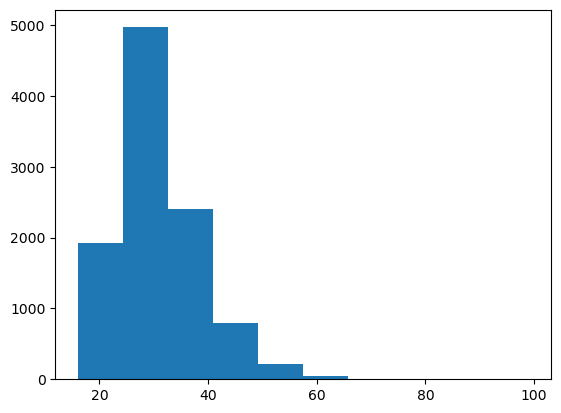

In [9]:
# your code goes here
plt.hist(df['Age'])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:xlabel='ConvertedComp'>

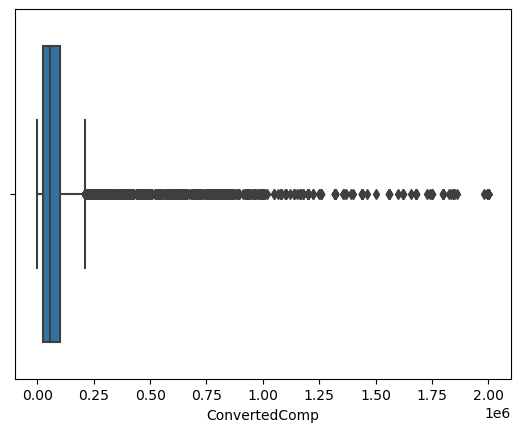

In [10]:
# your code goes here
sns.boxplot(data = df, x = 'ConvertedComp')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [14]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
iqr= Q3- Q1
iqr

73132.0

Find out the upper and lower bounds.


In [15]:
# your code goes here
lower = Q1 - (1.5*iqr)
upper = Q3 + (1.5*iqr)
print(lower)
print(upper)

-82830.0
209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [16]:
# your code goes here
outliers = (df["ConvertedComp"] < (Q1 - 1.5 * iqr)) | (df["ConvertedComp"] > (Q3 + 1.5 * iqr))
outliers.value_counts()

False    9703
True      879
Name: ConvertedComp, dtype: int64

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [18]:
# your code goes here
df = df[(df['ConvertedComp'] > lower) & (df['ConvertedComp'] < upper)]
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,9703.000000,9.703000e+03,9703.000000,9664.000000,7612.000000,9493.000000
mean,12501.007317,7.241139e+05,59883.208389,41.864782,4.737455,30.695860
std,7235.627217,7.186806e+06,43394.336755,24.613489,4.420472,7.346625
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6237.000000,2.000000e+04,24060.000000,40.000000,2.000000,25.000000
50%,12571.000000,6.300000e+04,52704.000000,40.000000,4.000000,29.000000
75%,18787.500000,1.150000e+05,85574.500000,42.000000,5.000000,34.000000
max,25141.000000,3.900000e+08,209356.000000,1012.000000,99.000000,99.000000


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [20]:
# your code goes here
df.corr()['Age']

Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
